# Imports

In [316]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression, LassoCV, Ridge, LogisticRegression, BayesianRidge, TweedieRegressor 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn import tree
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import *

# DataFrame, Data et Variables

In [317]:
df = pd.read_csv('logicimmo - Copie.csv')
X = df.drop('Prix (Euros)', axis = 1)
y = df['Prix (Euros)']

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [319]:
MAE_list = []
RMSE_list = []
median_abs_err_list = []
model_list = []
score_list = []

# Modèles  :

### Regression linéaire 

In [320]:
model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train,y_train)
score_lin_reg = model_lin_reg.score(X_test,y_test)
score_list.append(score_lin_reg)
score_lin_reg

0.852307773365766

In [321]:
cross_val_score(model_lin_reg, X, y, cv=5)

array([  0.79090888, -83.48100222,   0.78531564,   0.83156989,
        -2.8694372 ])

In [322]:
linear_selector = SelectFromModel(LinearRegression(),threshold='mean')
linear_selector.fit_transform(X,y)
linear_selector.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False])

In [323]:
y_pred = model_lin_reg.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))

MAE :  134828.28019470902
RMSE :  297121.5734325086
median absolut error :  79499.17851039022


In [324]:
MAE_lin_reg = mean_absolute_error(y_test,y_pred)
RMSE_lin_reg = np.sqrt(mean_squared_error(y_test, y_pred))
median_abs_err_lin_reg = median_absolute_error(y_test, y_pred)
MAE_list.append(MAE_lin_reg)
model_list.append("Regression \nLineaire")
RMSE_list.append(RMSE_lin_reg)
median_abs_err_list.append(median_abs_err_lin_reg)

<function matplotlib.pyplot.show(close=None, block=None)>

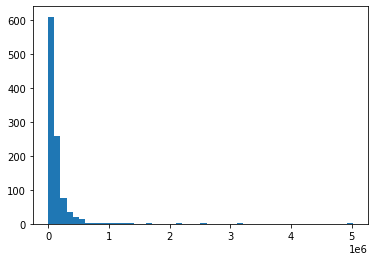

In [325]:
error_hist = np.abs(y_test - y_pred)
plt.hist(error_hist, bins=50)
plt.show

In [326]:
cross_val_score(model_lin_reg, X, y, cv=5, scoring='neg_mean_absolute_error')

array([-152884.21362369, -104756.0305361 , -173104.86260393,
       -230797.1864671 ,  -67311.92956468])

### Lasso CV

In [327]:
model_lasso_cv = LassoCV(cv=5)
model_lasso_cv.fit(X_train, y_train)
score_lasso_cv = model_lasso_cv.score(X_test, y_test)
score_list.append(score_lasso_cv)
score_lasso_cv

0.8406340516728005

In [328]:
cross_val_score(model_lasso_cv, X, y, cv=5)

array([  0.7908616 , -83.75179355,   0.77818214,   0.82865153,
        -3.22061011])

In [329]:
lasso_selector = SelectFromModel(LassoCV(cv=5),threshold='mean')
lasso_selector.fit_transform(X,y)
lasso_selector.get_support()

array([ True,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False])

In [330]:
y_pred = model_lasso_cv.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))

MAE :  136644.67510023227
RMSE :  308640.6556835957
median absolut error :  76458.97192399157


In [331]:
MAE_lasso_cv = mean_absolute_error(y_test,y_pred)
RMSE_lasso_cv = np.sqrt(mean_squared_error(y_test, y_pred))
median_abs_err_lasso_cv = median_absolute_error(y_test, y_pred)
MAE_list.append(MAE_lasso_cv)
model_list.append("Lasso CV")
RMSE_list.append(RMSE_lasso_cv)
median_abs_err_list.append(median_abs_err_lasso_cv)

<function matplotlib.pyplot.show(close=None, block=None)>

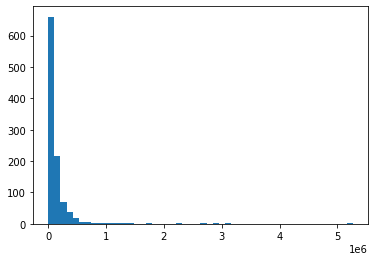

In [332]:
error_hist = np.abs(y_test - y_pred)
plt.hist(error_hist, bins=50)
plt.show

In [333]:
cross_val_score(model_lasso_cv, X, y, cv=5, scoring='neg_mean_absolute_error')

array([-146476.99164607, -101478.81082156, -171475.24680105,
       -228727.92393453,  -78407.28977636])

### Ridge

In [334]:
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
score_ridge = model_ridge.score(X_test, y_test)
score_list.append(score_ridge)
score_ridge

0.8523132263189912

In [335]:
cross_val_score(model_ridge, X, y, cv=5)

array([  0.79091685, -83.47632586,   0.78531354,   0.83164108,
        -2.86854223])

In [336]:
Ridge_selector = SelectFromModel(Ridge(),threshold='mean')
Ridge_selector.fit_transform(X,y)
Ridge_selector.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False])

In [337]:
y_pred = model_ridge.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))

MAE :  134823.62319614895
RMSE :  297116.08836049755
median absolut error :  79529.62503167242


In [338]:
MAE_ridge = mean_absolute_error(y_test,y_pred)
RMSE_ridge = np.sqrt(mean_squared_error(y_test, y_pred))
median_abs_err_ridge = median_absolute_error(y_test, y_pred)
MAE_list.append(MAE_ridge)
model_list.append("Ridge")
RMSE_list.append(RMSE_ridge)
median_abs_err_list.append(median_abs_err_ridge)

<function matplotlib.pyplot.show(close=None, block=None)>

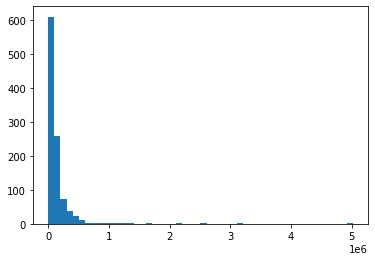

In [339]:
error_hist = np.abs(y_test - y_pred)
plt.hist(error_hist, bins=50)
plt.show

In [340]:
cross_val_score(model_ridge, X, y, cv=5, scoring='neg_mean_absolute_error')

array([-152870.57985798, -104750.25738684, -173102.62110546,
       -230752.12170093,  -67309.13474903])

### SVR

In [341]:
#model_SVR = SVR(kernel='rbf')
#model_SVR.fit(X_train,y_train)
#model_SVR.score(X_test,y_test)
#score trop faible, process long -> inutile

### DecisionTreeClassifier

In [342]:
model_decision_tree = tree.DecisionTreeClassifier()
model_decision_tree.fit(X_train,y_train)
score_decision_tree = model_decision_tree.score(X_test,y_test)
score_list.append(score_decision_tree)
score_decision_tree

0.24127906976744187

In [343]:
cross_val_score(model_decision_tree, X, y, cv=5)

C:\Users\kju78\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


array([0.27810078, 0.28419011, 0.27352085, 0.25509214, 0.19689622])

In [344]:
selector_tree = SelectFromModel(tree.DecisionTreeClassifier(),threshold='mean')
selector_tree.fit_transform(X,y)
selector_tree.get_support()

array([ True, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False])

In [345]:
y_pred = model_decision_tree.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))

MAE :  121693.88081395348
RMSE :  360075.4100474808
median absolut error :  30000.0


In [346]:
MAE_decision_tree = mean_absolute_error(y_test,y_pred)
RMSE_decision_tree = np.sqrt(mean_squared_error(y_test, y_pred))
median_abs_err_decision_tree = median_absolute_error(y_test, y_pred)
MAE_list.append(MAE_decision_tree)
model_list.append("Decision Tree \nClassifier")
RMSE_list.append(RMSE_decision_tree)
median_abs_err_list.append(median_abs_err_decision_tree)

<function matplotlib.pyplot.show(close=None, block=None)>

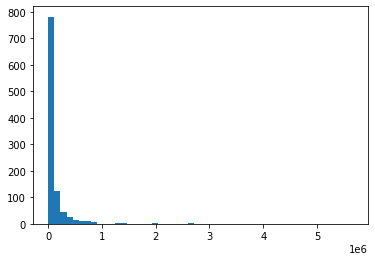

In [347]:
error_hist = np.abs(y_test - y_pred)
plt.hist(error_hist, bins=50)
plt.show

In [348]:
cross_val_score(model_decision_tree, X, y, cv=5, scoring='neg_mean_absolute_error')

C:\Users\kju78\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


array([-101136.27616279, -133484.31619787, -104711.2114452 ,
       -122454.02230844, -124361.76915616])

### RandomForestClassifier

In [349]:
model_random_forest = RandomForestClassifier(n_estimators=10)
model_random_forest.fit(X_train,y_train)
score_random_forest = model_random_forest.score(X_test,y_test)
score_list.append(score_random_forest)
score_random_forest

0.21608527131782945

In [350]:
cross_val_score(model_random_forest, X, y, cv=5)

C:\Users\kju78\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


array([0.24515504, 0.25121242, 0.25121242, 0.22890398, 0.16391853])

In [351]:
selector_random_forest = SelectFromModel(RandomForestClassifier(n_estimators=10),threshold='mean')
selector_random_forest.fit_transform(X,y)
selector_random_forest.get_support()

array([ True, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False])

In [352]:
y_pred = model_random_forest.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))

MAE :  152245.08527131783
RMSE :  428355.93843240256
median absolut error :  35000.0


In [353]:
MAE_random_forest = mean_absolute_error(y_test,y_pred)
RMSE_random_forest = np.sqrt(mean_squared_error(y_test, y_pred))
median_abs_err_random_forest = median_absolute_error(y_test, y_pred)
MAE_list.append(MAE_random_forest)
model_list.append("Random Forest \nClassifier")
RMSE_list.append(RMSE_random_forest)
median_abs_err_list.append(median_abs_err_random_forest)

<function matplotlib.pyplot.show(close=None, block=None)>

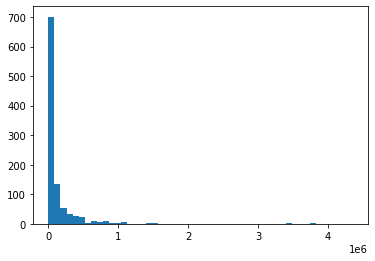

In [354]:
error_hist = np.abs(y_test - y_pred)
plt.hist(error_hist, bins=50)
plt.show

In [355]:
cross_val_score(model_random_forest, X, y, cv=5, scoring='neg_mean_absolute_error')

C:\Users\kju78\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


array([-155093.59689922, -159718.00193986, -156716.28225024,
       -167343.53055286, -149595.64888458])

### SGDClassifier

In [356]:
#model_SGD = SGDClassifier(max_iter=1000, tol=0.01)
#model_SGD.fit(X_train,y_train)
#model_SGD.score(X_test,y_test)

### LogisticRegression

In [357]:
#model_logistic_reg = LogisticRegression()
#model_logistic_reg.fit(X_train,y_train)
#model_logistic_reg.score(X_test,y_test)

### BayesianRidge

In [358]:
model_bayesian = BayesianRidge()
model_bayesian.fit(X_train, y_train)
score_bayesian = model_bayesian.score(X_test, y_test)
score_list.append(score_bayesian)
score_bayesian

0.8525138260549665

In [359]:
cross_val_score(model_bayesian, X, y, cv=5)

array([  0.79124067, -83.15788254,   0.78519372,   0.83313848,
        -2.8408571 ])

In [360]:
selector_bayesian = SelectFromModel(BayesianRidge(),threshold='mean')
selector_bayesian.fit_transform(X,y)
selector_bayesian.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False])

In [361]:
y_pred = model_bayesian.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))

MAE :  134584.64330180082
RMSE :  296914.2366307371
median absolut error :  80077.30519660935


In [362]:
MAE_bayesian = mean_absolute_error(y_test,y_pred)
RMSE_bayesian = np.sqrt(mean_squared_error(y_test, y_pred))
median_abs_err_bayesian = median_absolute_error(y_test, y_pred)
MAE_list.append(MAE_bayesian)
model_list.append("Bayesian \nRidge")
RMSE_list.append(RMSE_bayesian)
median_abs_err_list.append(median_abs_err_bayesian)

<function matplotlib.pyplot.show(close=None, block=None)>

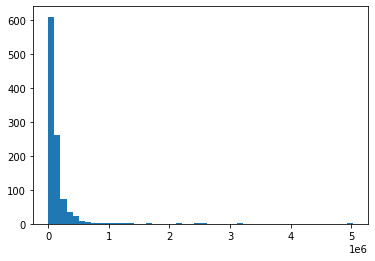

In [363]:
error_hist = np.abs(y_test - y_pred)
plt.hist(error_hist, bins=50)
plt.show

In [364]:
cross_val_score(model_bayesian, X, y, cv=5, scoring='neg_mean_absolute_error')

array([-152360.45739838, -104372.53376239, -172908.89753049,
       -229786.7388412 ,  -67208.03672126])

### TweedieRegressor

In [365]:
model_tweedie = TweedieRegressor(max_iter=1000)
model_tweedie.fit(X_train, y_train)
score_tweedie = model_tweedie.score(X_test, y_test)
score_list.append(score_tweedie)
score_tweedie

0.843098584337305

In [366]:
cross_val_score(model_tweedie, X, y, cv=5)

array([  0.79298073, -83.03996912,   0.77652359,   0.8257756 ,
        -3.21383296])

In [367]:
selector_tweedie = SelectFromModel(TweedieRegressor(max_iter=1000),threshold='mean')
selector_tweedie.fit_transform(X,y)
selector_tweedie.get_support()

array([ True,  True,  True, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False])

In [368]:
y_pred = model_tweedie.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))

MAE :  137112.57365599464
RMSE :  306244.8529552921
median absolut error :  76551.26248468453


In [369]:
MAE_tweedie = mean_absolute_error(y_test,y_pred)
RMSE_tweedie = np.sqrt(mean_squared_error(y_test, y_pred))
median_abs_err_tweedie = median_absolute_error(y_test, y_pred)
MAE_list.append(MAE_tweedie)
model_list.append("Tweedie \nRegressor")
RMSE_list.append(RMSE_tweedie)
median_abs_err_list.append(median_abs_err_tweedie)

<function matplotlib.pyplot.show(close=None, block=None)>

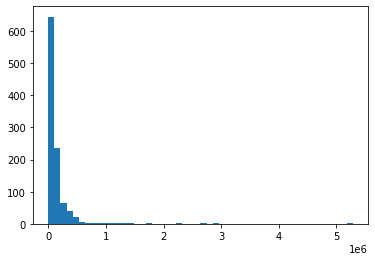

In [370]:
error_hist = np.abs(y_test - y_pred)
plt.hist(error_hist, bins=50)
plt.show

In [371]:
cross_val_score(model_tweedie, X, y, cv=5, scoring='neg_mean_absolute_error')

array([-145828.00021741, -100390.98287401, -173406.23471127,
       -231204.7450746 ,  -76346.42446033])

# Comparaisons des modèles

### Résultats :

#### Précision 

Text(0, 0.5, 'Accuracy')

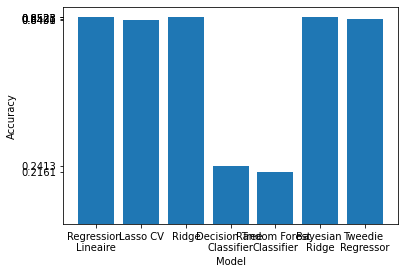

In [372]:
plt.bar(model_list, score_list)
plt.xticks(model_list)
plt.yticks(score_list)
plt.xlabel('Model')
plt.ylabel('Accuracy')

### Erreurs : 

Text(0, 0.5, 'MAE')

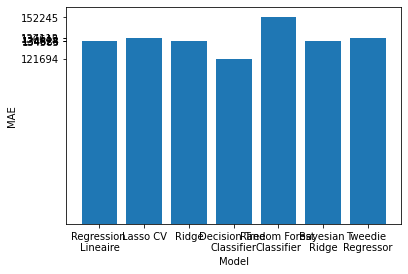

In [373]:
plt.bar(model_list, MAE_list)
plt.xticks(model_list)
plt.yticks(MAE_list)
plt.xlabel('Model')
plt.ylabel('MAE')

Text(0, 0.5, 'RMSE')

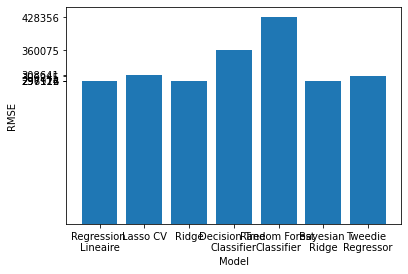

In [374]:
plt.bar(model_list, RMSE_list)
plt.xticks(model_list)
plt.yticks(RMSE_list)
plt.xlabel('Model')
plt.ylabel('RMSE')

Text(0, 0.5, 'Median Abs Error')

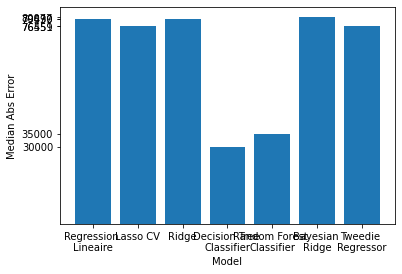

In [375]:
plt.bar(model_list, median_abs_err_list)
plt.xticks(model_list)
plt.yticks(median_abs_err_list)
plt.xlabel('Model')
plt.ylabel('Median Abs Error')